In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

In [6]:
data_frame = pd.read_csv("/content/Country-data (1).csv")
df = data_frame.copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
df.select_dtypes(exclude = 'object').corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


                 child_mort     exports    health     imports        income  \
KMeans_Clusters                                                               
0                  4.133333  176.000000  6.793333  156.666667  64033.333333   
1                 11.974194   44.772043  7.426989   45.501075  25390.000000   
2                 74.156338   30.611254  6.015915   44.071351   4363.281690   

                 inflation  life_expec  total_fer          gdpp  
KMeans_Clusters                                                  
0                 2.468000   81.433333   1.380000  57566.666667  
1                 5.423946   76.524731   1.943871  19881.182796  
2                11.094859   62.277465   4.329437   2019.211268  
                       child_mort     exports    health     imports  \
Hierarchical_Clusters                                                 
0                       11.492222   44.323333  7.449444   44.651111   
1                       72.221622   31.731068  6.045811   45.

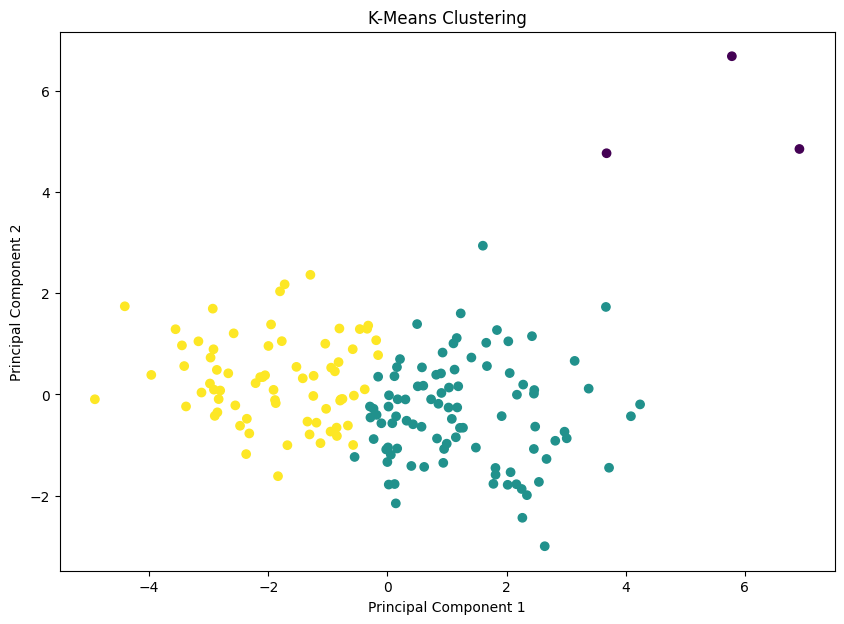

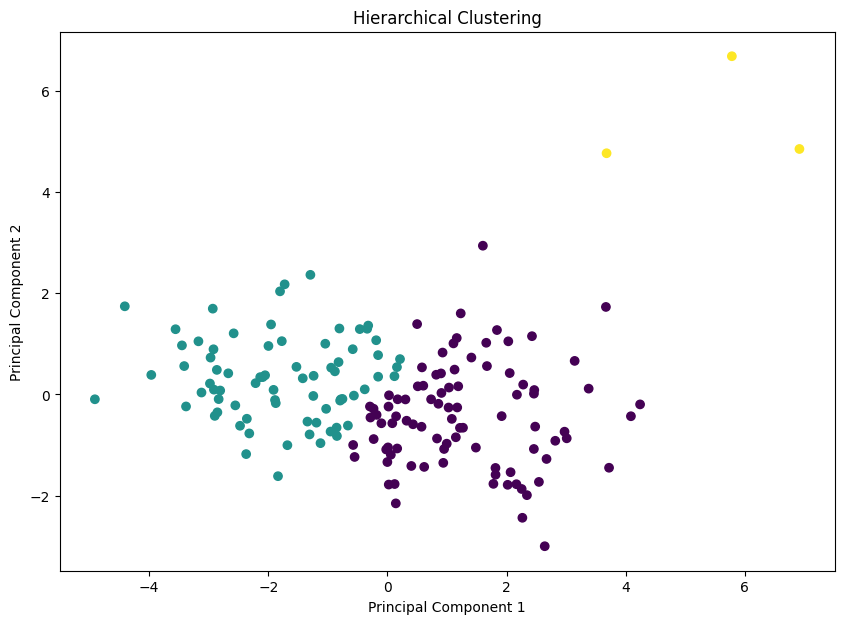

Silhouette score for K-Means: 0.44249722382762446
Silhouette score for Hierarchical: 0.4308434627918911


In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
X = df[features]


x = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(principalDf)
df['KMeans_Clusters'] = kmeans.labels_


hierarchical = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Hierarchical_Clusters'] = hierarchical.fit_predict(principalDf)



print(df.groupby('KMeans_Clusters')[features].mean())
print(df.groupby('Hierarchical_Clusters')[features].mean())

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=df['KMeans_Clusters'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=df['Hierarchical_Clusters'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')
plt.show()


silhouette_avg_kmeans = silhouette_score(principalDf, df['KMeans_Clusters'])
silhouette_avg_hierarchical = silhouette_score(principalDf, df['Hierarchical_Clusters'])
print("Silhouette score for K-Means:", silhouette_avg_kmeans)
print("Silhouette score for Hierarchical:", silhouette_avg_hierarchical)

